已连接到 jianmo (Python 3.10.14)

参数：β=0.3, γ=0.1, μ=0.01


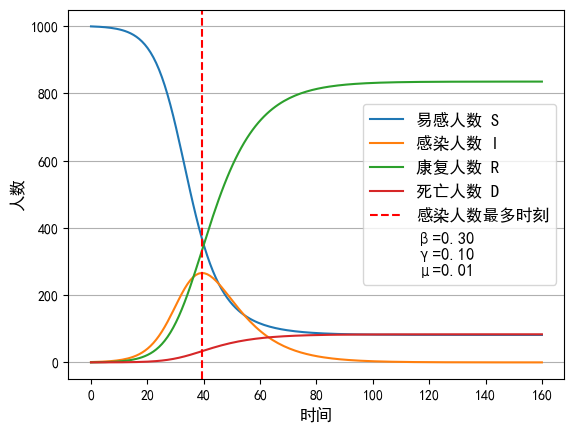

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号


# SIRD模型


def sird_model(y, t, beta, gamma, mu):
    S, I, R, D = y
    N = S + I + R + D
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return [dSdt, dIdt, dRdt, dDdt]


# 初始条件和时间点
y0 = [999, 1, 0, 0]  # 初始易感、感染、康复和死亡人数
t = np.linspace(0, 160, 160)  # 时间点

# 初始参数猜测
initial_guess = [0.3, 0.1, 0.01]
beta, gamma, mu = initial_guess

# 打印结果
print(f"参数：β={beta}, γ={gamma}, μ={mu}")

# 计算模型预测
solution = odeint(sird_model, y0, t, args=(beta, gamma, mu))   
S, I, R, D = solution.T

# 可视化结果
plt.plot(t, S, label='易感人数 S')
plt.plot(t, I, label='感染人数 I')
plt.plot(t, R, label='康复人数 R')
plt.plot(t, D, label='死亡人数 D')


# 在感染人数最多的时刻绘制一条垂直线
max_I_idx = np.argmax(I)
plt.axvline(x=t[max_I_idx], ymin=0, ymax=1, color='r', linestyle='--', label='感染人数最多时刻')

# 添加不可见的图例项
# 使用plt.legend()的handles和labels参数手动添加文本标签
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='none'))  # 不可见的线条
labels.append(f'β={beta:.2f}\nγ={gamma:.2f} \nμ={mu:.2f}')

plt.legend(handles, labels, loc='best', fontsize=12)
plt.xlabel('时间', fontsize=12)
plt.ylabel('人数', fontsize=12)
plt.grid(True,axis='y')
# plt.title('SIRD模型')
plt.show()